# Проект 2. Разведывательный анализ данных (EDA)

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Цель проекта: выявить наиболее значимые признаки для дальнейшего построения модели, предсказывающей итоговый балл по математике.
Задачи:
    - провести работу с отсутствующими данными;
    - выявить выбросы и исключить их;
    - для количественных переменных построить гистограммы распределений;
    - провести корреляционный анализ и анализ номинативных переменных;
    - отобрать переменные для построения модели;
    - сделать промежуточные и итоговые выводы.

## Подключение модулей и чтение файла

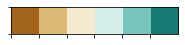

In [1]:
# импорт необходимых пакетов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as ticker
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import percentileofscore
from scipy import stats

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

plt.style.use('seaborn-pastel')  # выбор стиля графиков
sns.palplot(sns.color_palette("BrBG"), 0.5)
sns.set_style("whitegrid")
sns.axes_style("whitegrid")

stud_math = pd.read_csv('stud_math.csv')  # чтение данных из CSV файла

## Просмотр данных и получение информации о них

In [2]:
display(stud_math.head(10))  # показ десяти верхних строк

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


## Первичная обработка данных

In [4]:
# В описании к файлу нет колонки 'studytime, granular', поэтому сразу ее удаляем
stud_math.drop(['studytime, granular'], axis='columns', inplace=True)

In [5]:
stud_math.columns  # просмотр названий колонок

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

In [6]:
# редактирование названий колонок
stud_math.columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'parents_status', 'mum_edu',
    'father_edu', 'mum_job', 'father_job', 'reason', 'guardian', 'traveltime',
    'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
    'health', 'absences', 'score'
]

In [7]:
# Получение информации о типе данных и их количестве
print(stud_math.shape)
print(stud_math.dtypes)

(395, 29)
school             object
sex                object
age                 int64
address            object
famsize            object
parents_status     object
mum_edu           float64
father_edu        float64
mum_job            object
father_job         object
reason             object
guardian           object
traveltime        float64
studytime         float64
failures          float64
schoolsup          object
famsup             object
paid               object
activities         object
nursery            object
higher             object
internet           object
romantic           object
famrel            float64
freetime          float64
goout             float64
health            float64
absences          float64
score             float64
dtype: object


In [8]:
# отбор числовых колонок
df_numeric = stud_math.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['age' 'mum_edu' 'father_edu' 'traveltime' 'studytime' 'failures' 'famrel'
 'freetime' 'goout' 'health' 'absences' 'score']


In [9]:
# отбор колонок с категориальными значениями
df_non_numeric = stud_math.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['school' 'sex' 'address' 'famsize' 'parents_status' 'mum_job'
 'father_job' 'reason' 'guardian' 'schoolsup' 'famsup' 'paid' 'activities'
 'nursery' 'higher' 'internet' 'romantic']


Всего имеется 395 наблюдений с 29 переменными. В каждой строке один студент, а в каждом столбце содержится характеристика о нем. Столбец оценки ('score') является целевой переменной.

 ## Работа с отсутствующими данными

### Тепловая карта пропущенных значений

<AxesSubplot:>

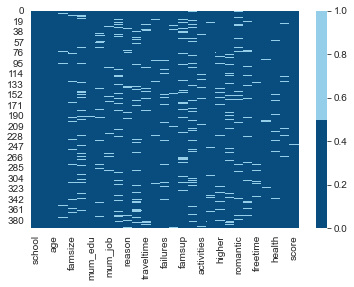

In [10]:
cols = stud_math.columns[:]  # все колонки
# определяем цвета
# голубой - пропущенные данные, синий - не пропущенные
colours = ['#094d7e', '#94cee9']
sns.heatmap(stud_math[cols].isnull(), cmap=sns.color_palette(colours))

Приведенная выше карта демонстрирует паттерн пропущенных значений для всех признаков набора. По горизонтальной оси расположены признаки, по вертикальной – количество записей/строк. Голубой цвет соответствует пропускам данных.

## Процентный список пропущенных данных

Составим список долей отсутствующих значений для каждого признака:

In [11]:
for col in stud_math.columns:
    pct_missing = np.mean(stud_math[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
parents_status - 11.0%
mum_edu - 1.0%
father_edu - 6.0%
mum_job - 5.0%
father_job - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


Нулевые значения отсутствуют только у колонок, в которых содержится информация о школе, поле ученика и его возрасте. С остальными необходимо поработать.

## Отбрасывание признаков и записей

Метод обрасывания признаков на данном этапе может применяться только для неинформативных параметров.
В процентном списке, построенном выше, видно, что все признаки имеют низкий процент недостающих значений, поэтому пока не будем отбрасывать ни один из признаков.

Поскольку информация о полуенном балле по госэкзамену по математике является основополагающей и нулевые значения по этому признаку составляют незначительную часть, то записи, в которых есть пропуски в столбце 'score' учитываться не будут:

In [12]:
# удаление строк, в которых отсутствует запись о среднем балле за экзамен
stud_math.dropna(subset=['score'], inplace=True)

## Внесение недостающих значений

В данных есть 12 числовых признаков, из них 11 имеют недостающие значения: 'mum_edu', 'father_edu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score'.

В этом датасете числовые признаки представляют собой своего рода тоже категориальные значения (кроме столбца 'score'), поэтому заполним пропуски наиболее часто встречаемым значением:

In [13]:
# введение (присвоиение) пропущенных значений
# и создание индикаторных переменных отсутствующих значений для каждого числового столбца
df_numeric = stud_math.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = stud_math[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # выполнение только для столбцов, в которых отсутствуют значения.
        md = stud_math[col].mode()  # вычисление моды
        stud_math[col] = stud_math[col].fillna(md)  # заполнение ячейки модой

В данных имеется 17 категориальных признаков, из них в 15 есть недостающие значения: 'address', 'famsize', 'parents_status', 'mum_job', 'father_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'.

Для каждого категориального параметра заменим все недостающие значения наиболее часто встречающимся значением этого признака:

In [14]:
# введение (присвоиение) пропущенных значений
# и создание индикаторных переменных отсутствующих значений для каждого нечислового столбца
df_non_numeric = stud_math.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = stud_math[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # выполнение только для столбцов, в которых отсутствуют значения
        top = stud_math[col].describe()['top']
        stud_math[col] = stud_math[col].fillna(top)

Ещё раз сделаем проверку на нулевые значения:

In [15]:
count_nan = len(stud_math) - stud_math.count()
print(count_nan)

school             0
sex                0
age                0
address            0
famsize            0
parents_status     0
mum_edu            3
father_edu        24
mum_job            0
father_job         0
reason             0
guardian           0
traveltime        28
studytime          7
failures          22
schoolsup          0
famsup             0
paid               0
activities         0
nursery            0
higher             0
internet           0
romantic           0
famrel            27
freetime           9
goout              7
health            15
absences          11
score              0
dtype: int64


Нулевых значений не осталось, поэтому можем переходить к работе с выбросами.

# Работа с выбросами

Построим для численных признаков гистограмму или диаграмму "ящик с усами", чтобы увидеть распределение по признаку и отследить выбросы или ошибочные записи:

<AxesSubplot:>

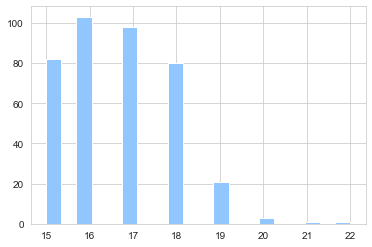

In [16]:
# age — возраст ученика (от 15 до 22)
stud_math['age'].hist(bins=20)

Из гистограммы видно, что в столбце 'age' выбросов нет, поскольку все значения находятся в интервале от 15 до 22, что соответствует информации, указанной в описании к датасету.

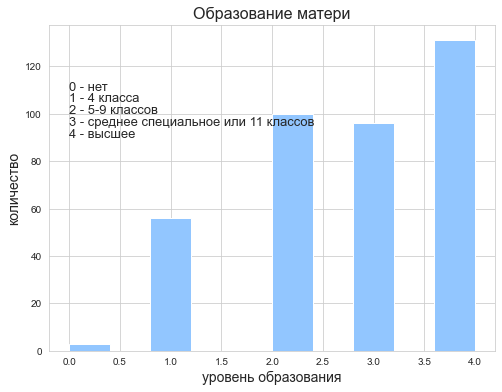

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(stud_math['mum_edu'])

ax.set_title('Образование матери', fontsize=16)
ax.set_xlabel('уровень образования', fontsize=14)
ax.set_ylabel('количество', fontsize=14)

ax.text(0, 110, '0 - нет', fontsize=13)
ax.text(0, 105, '1 - 4 класса', fontsize=13)
ax.text(0, 100, '2 - 5-9 классов', fontsize=13)
ax.text(0, 95, '3 - среднее специальное или 11 классов', fontsize=13)
ax.text(0, 90, '4 - высшее', fontsize=13)

plt.show()

Из построенной гистограммы для столбца 'mum_edu', в котором хранится информация об уровне образования матери, выбросы не обнаружены.
Посмотрим на процентное распределение, построив круговую диаграмму:

Text(0.5, 0.98, 'Образование матери')

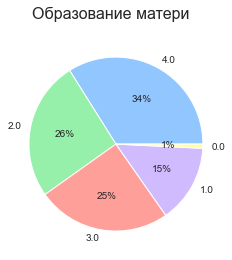

In [18]:
stud_math.mum_edu.value_counts().plot(kind='pie',
                                      label='mum_edu',
                                      autopct='%1.0f%%')
plt.ylabel(None)
plt.suptitle('Образование матери', fontsize=16)

Из круговой диаграммы видно, что 33% имеют высшее образование, 25% - среднее специальное или 11 классов и почти столько же (25%) закончили 5-9 классов, остальные либо не имеют образования, либо закончили один или несколько классов. Проверим влияние этого параметра на успеваемость учащихся в следующем разделе.

<AxesSubplot:>

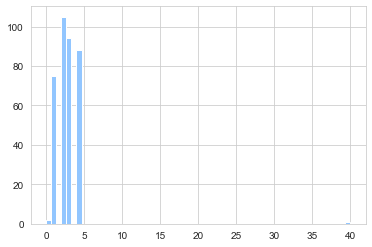

In [19]:
# Построим гистограмму по столбцу 'father_edu':
stud_math['father_edu'].hist(bins=60)

Данные на гистограмме отображены искаженно, чтобы лучше изучить данные об образовании отца, построим коробчатую диаграмму по столбцу 'father_edu':

<AxesSubplot:>

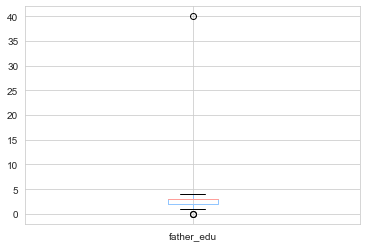

In [20]:
stud_math.boxplot(column=['father_edu'])

На диаграмме четко видно, что в столбце имеются выбросы. Поскольку выброс единичный и сказать точно о характере выброса точно нельзя -  ошибочное это значение, или опечатка, или на этом месте и вовсе не было изначально никагого значения и вписали случайное значение, то мы просто не будем его учитывать.

## Дополнение: описательная статистика (как альтернатива)

Отклонения численных признаков могут быть слишком четкими, чтобы не визуализироваться коробчатой диаграммой. Вместо этого можно проанализировать их описательную статистику.

Например, для признака father_edu видно, что максимальное значение равно 40, в то время как 75% квартиль равен только 3. Значение 40 – выброс.

In [21]:
stud_math['father_edu'].describe()

count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: father_edu, dtype: float64

In [22]:
# Принимая во внимание, что значения в данном столбце могут быть от 0 до 4,
# а по факту имеем от 0 до 40,
# то будем учитывать значения только строго меньше 5:
stud_math = stud_math.loc[stud_math.father_edu < 5]

Text(0.5, 0.98, 'Образование отца')

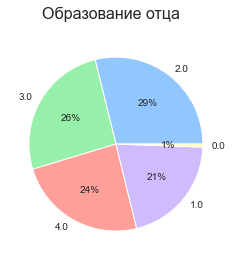

In [23]:
# Построим круговую диаграмму для проверки и уточнения процентного соотношения:
stud_math.father_edu.value_counts().plot(kind='pie',
                                         label='father_edu',
                                         autopct='%1.0f%%')
plt.ylabel(None)
plt.suptitle('Образование отца', fontsize=16)

Из круговой диаграммы видно, что большинство отцов (33%) закончили 5-9 классов, а высшее образование имеют 22%. В целом эти данные можно использовать для проверки влияния образования отца на успеваемость учащегося.

Text(0.5, 1.0, 'Время в пути до школы')

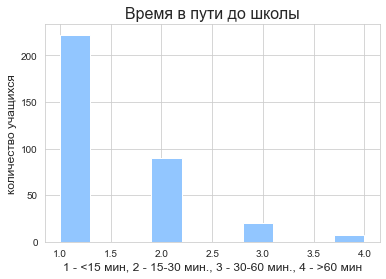

In [24]:
stud_math['traveltime'].plot(kind='hist', grid=True)
plt.xlabel('1 - <15 мин, 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин',
           fontsize=12)
plt.ylabel('количество учащихся', fontsize=12)
plt.title('Время в пути до школы', fontsize=16)

Из гистграммы, построенной по столбку 'traveltime', можно однозначно сделать вывод, что больше половины учащихся тратят на дорогу до школы меньше 15 минут, однако есть и те, кто тратит больше 30 минут и даже больше часа. Выбросов не обнаружено.

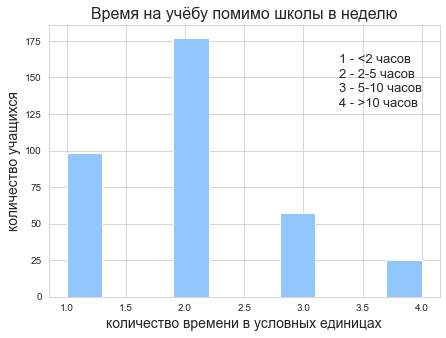

In [25]:
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(stud_math['studytime'])

ax.set_title('Время на учёбу помимо школы в неделю', fontsize=16)
ax.set_xlabel('количество времени в условных единицах', fontsize=14)
ax.set_ylabel('количество учащихся', fontsize=14)

ax.text(3.3, 160, '1 - <2 часов', fontsize=13)
ax.text(3.3, 150, '2 - 2-5 часов', fontsize=13)
ax.text(3.3, 140, '3 - 5-10 часов', fontsize=13)
ax.text(3.3, 130, '4 - >10 часов', fontsize=13)

plt.show()

В столбце 'studytime' выбросы не обнаружены. В дальнейшем бцдем использовать информацию об уделяемом времени на учёбу помимо школы для выяления влияния на успеваемость или его отсутствие.

<AxesSubplot:title={'center':'Количество учащихся по объему внеучебных неудач'}, xlabel='объем внеучебных неудач', ylabel='количество учащихся'>

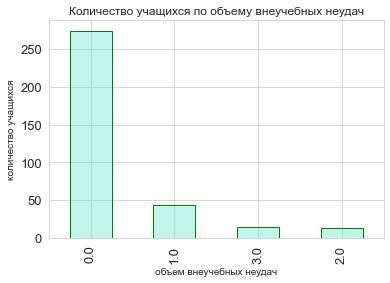

In [26]:
# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0
stud_math['failures'].value_counts().plot(
    kind='bar',
    grid=True,
    color=(0.4, 0.9, 0.8, 0.4),
    edgecolor='green',
    colormap='coolwarm',
    title='Количество учащихся по объему внеучебных неудач',
    xlabel='объем внеучебных неудач',
    ylabel='количество учащихся',
    fontsize=13)

В столбце 'failures' хранятся данные о наличии неудач, которые не касаются учебного процесса. Выбросы не отмечены. Переведем эти данные в категориальный формат:

In [27]:
# наличие неудач
def fail(c):
    if c == 0:
        return 'отсутствуют'
    elif c == 1 or c == 2 or c == 3:
        return 'есть'
    else:
        return 'неизвестно'


# добавление колонки с обозначением наличия неудач
stud_math['fail'] = stud_math.failures.apply(fail)

Построим круговую диаграмму для проверки и уточнения процентного соотношения:

Text(0.5, 0.98, 'Наличие внеучебных неудач')

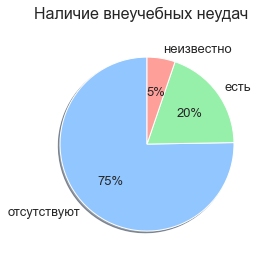

In [28]:
stud_math.fail.value_counts().plot(kind='pie',
                                   autopct='%1.0f%%',
                                   fontsize=13,
                                   shadow=True,
                                   startangle=90)
plt.ylabel(None)
plt.suptitle('Наличие внеучебных неудач', fontsize=16)

В 80% записей о наличии внеучебных неудач говорится об отсутствии этих неудач либо о том, что о них ничего неизвестно. Можно попробовать изучить оставшиеся наблюдения о 20% учащихся, у которых эти неудачи однозначно были, однако данный параметр не может быть решающим, поскольку есть сомнения касательно сбора этой информации.

Посмотрим на столбец, в котором отражены сведения об отношениях в семье:

<AxesSubplot:title={'center':'Отношения в семье'}, ylabel='Frequency'>

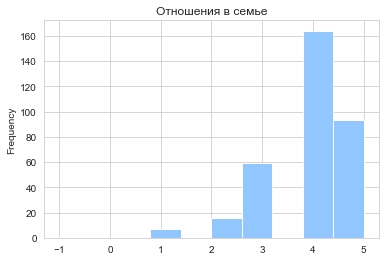

In [29]:
stud_math['famrel'].plot(kind='hist', grid=True, title='Отношения в семье')

Столбец 'famrel' (семейные отношения) должен содержать значения от 1 (очень плохо) до 5 (очень хорошо). На диаграмме виден выброс - '-1'. Отфильтруем данные, исключив ложные значения:

In [30]:
stud_math = stud_math.loc[stud_math.famrel >= 0]

Проверим от всех ли выбросов мы избавились и посмотрим процентное распределние по данному признаку:

Text(0.5, 1.0, 'Отношения в семье: 1 (очень плохие) - 5 (очень хорошие)')

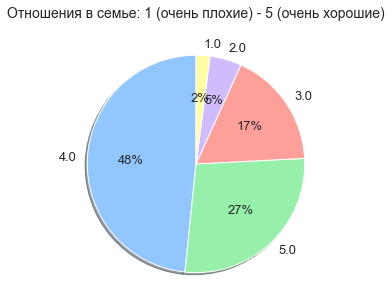

In [31]:
stud_math.famrel.value_counts().plot(kind='pie',
                                     autopct='%1.0f%%',
                                     shadow=True,
                                     startangle=90,
                                     figsize=(5, 5),
                                     fontsize=13)

plt.ylabel(None)
plt.title('Отношения в семье: 1 (очень плохие) - 5 (очень хорошие)',
          fontsize=14,
          pad=10)

В подавляющем большинстве семейные отношения хорошие или очень хорошие, однако есть незначительный процент семей, в которых сложились трудные отношения.

Text(0.5, 1.0, 'Количество свободного времени: 1 (очень мало) - 5 (очень мого)')

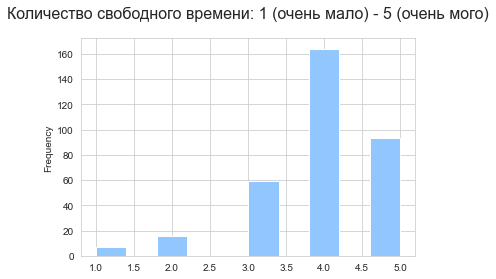

In [32]:
stud_math['famrel'].plot(kind='hist', grid=True)
plt.title('Количество свободного времени: 1 (очень мало) - 5 (очень мого)',
          fontsize=16,
          pad=20)

В столбце 'famrel' выбросы не найдены.

Text(0.5, 1.0, 'Проведение времени с друзьями')

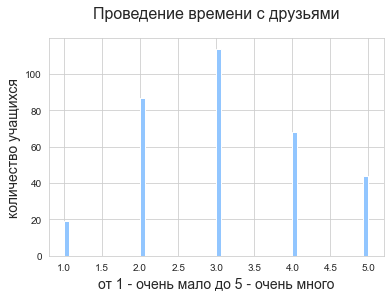

In [33]:
stud_math['goout'].hist(bins=60)
plt.xlabel('от 1 - очень мало до 5 - очень много', fontsize=14)
plt.ylabel('количество учащихся', fontsize=14)
plt.title('Проведение времени с друзьями', fontsize=16, pad=20)

В столбце 'goout' выбросов нет.

Text(0.5, 1.0, 'Состояние здоровья')

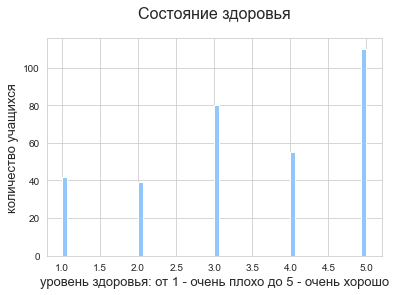

In [34]:
stud_math['health'].hist(bins=60)
plt.xlabel('уровень здоровья: от 1 - очень плохо до 5 - очень хорошо',
           fontsize=13)
plt.ylabel('количество учащихся', fontsize=13)
plt.title('Состояние здоровья', fontsize=16, pad=20)

В столбце 'health' выбросы не найдены.

Text(0.5, 1.0, 'Количество пропущенных занятий')

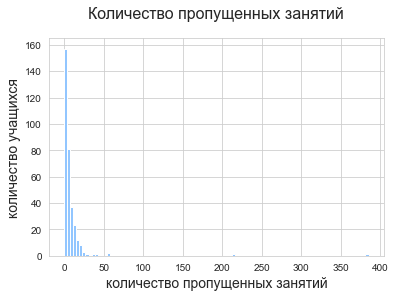

In [35]:
# absences — количество пропущенных занятий
stud_math['absences'].hist(bins=100)
plt.xlabel('количество пропущенных занятий', fontsize=14)
plt.ylabel('количество учащихся', fontsize=14)
plt.title('Количество пропущенных занятий', fontsize=16, pad=20)

В столбце 'absences' представлена информация о количестве пропущенных занятий. В нём существенное количество странных записей, которые неизвестно как интерпретировать. Ученик мог болеть и поэтому у него огромное количество пропущенных занятий, но это может быть и ученик, который уже давным давно учится в другом учебном заведении или проходит обучение на дому, однако продолжает числиться в этой школе и то, что кого-то не было на занятиях больше половины года, может быть и правдой.

Проведем краткий анализ взаимосвязи (или ее отсутствия) информации о количестве пропущенных занятий и полученном балле за госэкзамен по математике.

Text(0.5, 1.0, 'Зависимость балла по математике от количества пропущенных занятий')

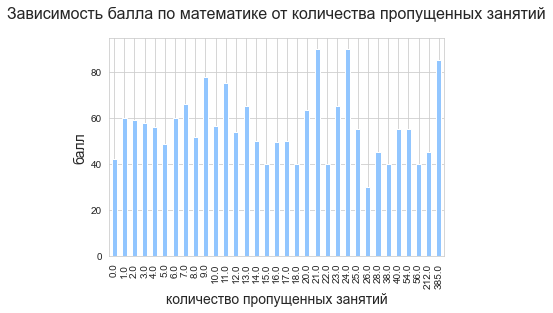

In [36]:
stud_math.groupby('absences')['score'].mean().plot(kind='bar')
plt.xlabel('количество пропущенных занятий', fontsize=14)
plt.ylabel('балл', fontsize=14)
plt.title('Зависимость балла по математике от количества пропущенных занятий',
          fontsize=16, pad=20)

Явной зависимости успеваемости учащегося от количества пропущенных занятий по имеющимся записям не наблюдается, даже если учесть все выбросы. В данном анализе этот параметр учитываться не будет.

In [37]:
# удаление столбца 'absences', в котором хранится информация о количестве пропущенных занятий
stud_math.drop(['absences'], axis='columns', inplace=True)

Посмотрим на самый главный столбец 'score', говорящий о полученном балле по госэкзамену по математике:

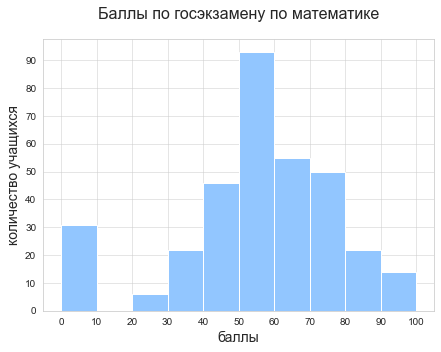

In [38]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(stud_math['score'])
ax.set_title('Баллы по госэкзамену по математике', fontsize=16, pad=20)
ax.set_xlabel('баллы', fontsize=14)
ax.set_ylabel('количество учащихся', fontsize=14)
ax.grid(which="major", linewidth=0.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.show()

Большинство оценок распределены между 20 и 100 (медиана 3.25, 25-й перцентиль 42.5 и 75-й — 70.0), что позволяет сделать два предположения:

1. Скорее всего была использована стобальная шкала оценивания;
2. В данных могут быть выбросы.


25-й перцентиль: 42.5, 75-й перцентиль: 70.0, IQR: 27.5,  Границы выбросов: [1.25, 111.25].


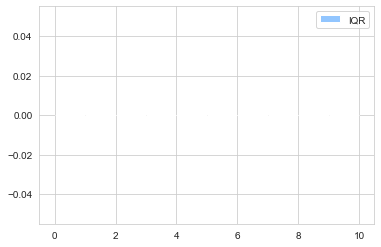

In [39]:
median = stud_math.score.median()
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5 * IQR,
                                           l=perc75 + 1.5 * IQR))
stud_math.score.loc[stud_math.score.between(perc25 - 1.5 * IQR, perc75 +
                                            1.5 * IQR)].hist(bins=10,
                                                             range=(0, 10),
                                                             label='IQR')
plt.legend()

In [40]:
# Избавимся от выбросов
stud_math = stud_math.loc[stud_math.score.between(perc25 - 1.5 * IQR,
                                                  perc75 + 1.5 * IQR)]

In [41]:
# Просмотр числа оставшихся записей и признаков
print(stud_math.shape)

(308, 29)


## Информация о столбцах с категориальным типом данных

In [42]:
# Просмотр уникальных значений для столбца 'school'
display(pd.DataFrame(stud_math.school.value_counts()))
print("Уникальных значений:", stud_math.school.nunique())
stud_math.loc[:, ['school']].info()

,school
GP,272
MS,36


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  308 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB


Сделаем этот шаг для всех столбцов с категориальным типом данных:

In [43]:
# Подсчет значений для категориальных столбцов (просмотр уникальных значений)
for col in stud_math.columns:
    if stud_math[col].dtype == 'object':
        print(
            '\nColumn Name:',
            col,
        )
        print(stud_math[col].value_counts())


Column Name: school
GP    272
MS     36
Name: school, dtype: int64

Column Name: sex
F    162
M    146
Name: sex, dtype: int64

Column Name: address
U    243
R     65
Name: address, dtype: int64

Column Name: famsize
GT3    218
LE3     90
Name: famsize, dtype: int64

Column Name: parents_status
T    281
A     27
Name: parents_status, dtype: int64

Column Name: mum_job
other       118
services     76
at_home      46
teacher      41
health       27
Name: mum_job, dtype: int64

Column Name: father_job
other       185
services     77
teacher      23
at_home      12
health       11
Name: father_job, dtype: int64

Column Name: reason
course        114
reputation     86
home           77
other          31
Name: reason, dtype: int64

Column Name: guardian
mother    224
father     65
other      19
Name: guardian, dtype: int64

Column Name: schoolsup
no     267
yes     41
Name: schoolsup, dtype: int64

Column Name: famsup
yes    197
no     111
Name: famsup, dtype: int64

Column Name: paid
no   

Из выше представленной информации видно, что после обработки мы имеем данные, где:
- есть всего две школы, причём записей об учениках школы GP существенно больше, чем школы MS;
- распределение учеников примерно одинаковое (180 девочек и 159 мальчиков);
- учеников, имеющих адрес проживания в городе гораздо больше (266), чем за городом(73);
- учеников из маленьких семей больше половины (245 из 339);
- родители, как правило, живут вместе (311 против 28);
- в сведениях о работе матери большинство значений имеют вариант "другое".
- в сведениях о работе матери большинство значений имеют вариант "другое".
...

Эту информацию следует принимать во внимание при построении модели и подведении заключительных выводов.

Собрав некоторую информацию об распределении учащихся по разным признакам, принимая во внимание эти данные, перейдем к поиску зависимостей.

## Корреляционный анализ

Для выбора наиболее значимых признаков проведем корреляционный анализ и найдем те, которые имеют наибольшую (положительную или отрицательную) корреляцию со столбцом 'score' - баллом по госэкзамену по математике.

In [44]:
# Найдем корреляцию и отсортируем
stud_math.corr()['score'].sort_values()

failures     -0.272112
goout        -0.160280
age          -0.135764
traveltime   -0.081853
health       -0.056890
freetime     -0.009284
famrel        0.020343
father_edu    0.136063
studytime     0.149390
mum_edu       0.180558
score         1.000000
Name: score, dtype: float64

### Положительная корреляция

Положительная корреляция параметра 'mum_edu' и 'father_edu' c 'score' указывает на то, что с увеличением этих показателя (чем выше образование матери и отца) балл по госэкзамену имеет тенденцию к увеличению. Причем от уровня образования матери итоговый балл зависит сильнее, чем от образования отца.

Положительная корреляция параметра 'studytime' c 'score' может говорить о том, что при увеличении затрачиваемого времени на учёбу помимо школы показатель в столбце 'score' (итоговый балл) имеет возврастающих характер.

### Отрицательная корреляция

Отрицательная корреляция параметра 'failures' c 'score' может говорить о том, что с увеличением этого показателя (наличие внеучебных неудач) балл по госэкзамену имеет тенденцию к снижению.

Отрицательная корреляция параметра 'age' c 'score' указывает на то, что чем старше ученик, тем больше вероятность, что его балл будет ниже.

Отрицательная корреляция параметра 'goout' c 'score' показывает, что чем больше ученик проведит время с друзьями, тем больше вероятность, что его балл будет ниже.

Проверим влияние возраста ученика на набранный балл:

<AxesSubplot:xlabel='age', ylabel='score'>

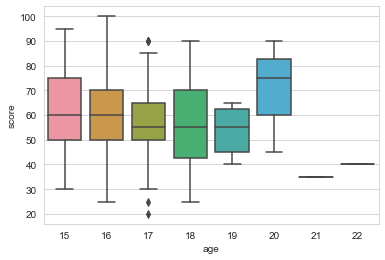

In [74]:
sns.boxplot(x = 'age', y = 'score', data = stud_math)

Вывод: параметр 'age' оказывает влияние на итоговый балл, только в том случае, если этот показатель выше 20. Линейной зависимости нет.

### Итоговый балл по признакам

Посмотрим, влияет ли пол ученика на набранный былл по госэкзамену по математике:

In [66]:
# средний балл у мальчиков (M) и у девочек (F)
score_sex = stud_math.groupby(['sex']).score.mean()
display(round(score_sex, 2))

sex
F    56.17
M    59.52
Name: score, dtype: float64

In [46]:
# Разница в среднем балле у мальчиков и девочек
sex_score = ((54.65 - 50.19) * 100) / 50.19
print(
    'Вывод: на', round(sex_score, 1),
    '% средний балл по госэкзамену по математике у мальчиков выше, чем у девочек'
)

Вывод: на 8.9 % средний балл по госэкзамену по математике у мальчиков выше, чем у девочек


In [68]:
# средний балл по школам
score_school = stud_math.groupby(['school']).score.mean()
display(round(score_school, 2))

school
GP    58.31
MS    53.61
Name: score, dtype: float64

Средний балл по госэкзамену по математике в школе GP выше, однако совсем незначительно. Посмотрим на оценки в разных школах и по полу учащихся:

<AxesSubplot:xlabel='school', ylabel='score'>

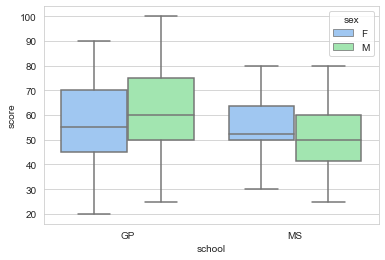

In [48]:
sns.boxplot(x='school', y='score', data=stud_math, hue='sex')

Проверим, нет ли существенно неравномерного распределения мальчиков и девочек по школам:

In [49]:
ms = stud_math[stud_math.school == 'MS'].sex.value_counts(normalize=True)
display('Распределение девочек и мальчиков в школе MS:', ms)

'Распределение девочек и мальчиков в школе MS:'

F    0.5
M    0.5
Name: sex, dtype: float64

In [50]:
gp = stud_math[stud_math.school == 'GP'].sex.value_counts(normalize=True)
display('Распределение девочек и мальчиков в школе GP:', gp)

'Распределение девочек и мальчиков в школе GP:'

F    0.529412
M    0.470588
Name: sex, dtype: float64

Неравномерного распределения мальчиков и девочек по полу не наблюдается. В школе GP выше средний балл имеют мальчики, однако в школе MS средний балл выше имеют девочки. При этом средний балл у девочек в разных школах он примерно одинаковый, в то время как у мальчиков в школе GP он выше, а в школе MS ниже. Большее количество наблюдений мы имеем из школы GP, поэтому в приоритете данные именно по этой школе (т.к. по ней мы имеем большую выборку).

В зависимости от количества отбираемых признаков данные о поле ученика и школе можно как оставить для дальнейшей работы, так и не принимать их во внимание.

### Графики плотности набранного балла по признакам

Для номинативных переменных построим графики распределения плотности переменных:

Text(0.5, 1.0, 'Распределение баллов в зависимости от доступа к интернету')

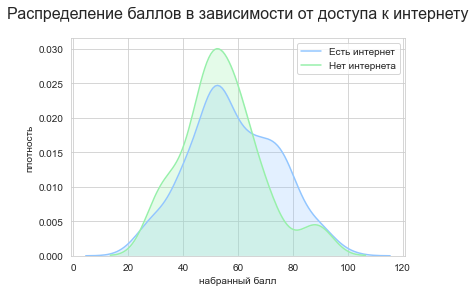

In [51]:
# Распределение баллов в зависимости от наличия интернета
sns.kdeplot(stud_math.loc[stud_math['internet'] == 'yes', 'score'],
            label='Есть интернет',
            shade=True)
sns.kdeplot(stud_math.loc[stud_math['internet'] == 'no', 'score'],
            label='Нет интернета',
            shade=True)

# Добавление надписей
plt.xlabel('набранный балл')
plt.ylabel('плотность')
plt.title('Распределение баллов в зависимости от доступа к интернету',
          fontsize=16,
          pad=20)

Вывод: наличие или отсутствие доступа к интернету может сказываться на успеваемости учащегося. Оставим этот параметр для построения модели.

Text(0.5, 1.0, 'График плотности итоговых оценок по местоположению')

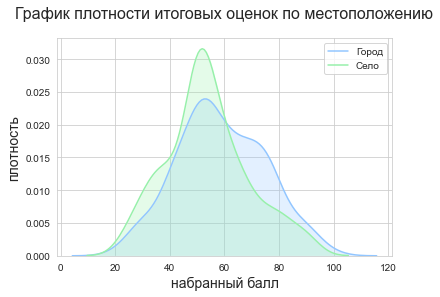

In [70]:
# Распределение баллов в зависимости от места проживания
sns.kdeplot(stud_math.loc[stud_math['address'] == 'U', 'score'],
            label='Город',
            shade=True)
sns.kdeplot(stud_math.loc[stud_math['address'] == 'R', 'score'],
            label='Село',
            shade=True)

# Добавление надписей
plt.xlabel('набранный балл', fontsize=14)
plt.ylabel('плотность', fontsize=14)
plt.title('График плотности итоговых оценок по местоположению',
          fontsize=16,
          pad=20)

Вывод: место проживания может влиять на итоговый балл. Оставим этот параметр для построения модели.

Text(0.5, 1.0, 'График плотности итогового балла в зависимости от желания получить высшее образование')

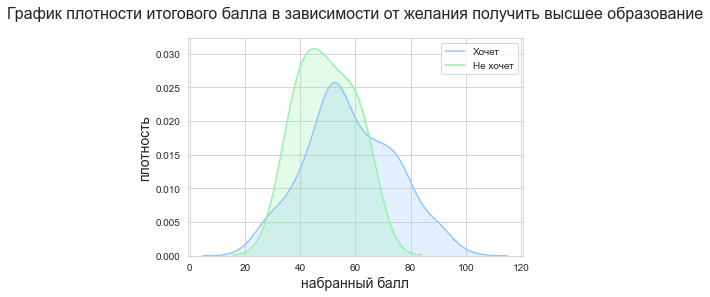

In [69]:
# Распределение баллов в зависимости от желания получить высшее образование
sns.kdeplot(stud_math.loc[stud_math['higher'] == 'yes', 'score'],
            label='Хочет',
            shade=True)
sns.kdeplot(stud_math.loc[stud_math['higher'] == 'no', 'score'],
            label='Не хочет',
            shade=True)

# Добавление надписей
plt.xlabel('набранный балл', fontsize=14)
plt.ylabel('плотность', fontsize=14)
plt.title(
    'График плотности итогового балла в зависимости от желания получить высшее образование',
    fontsize=16,
    pad=20)

In [ ]:
Вывод: итоговый балл зависит от желания (или его отсутствия) получить высшее образование. Оставим этот параметр для построения модели.

Text(0.5, 1.0, 'График плотности итоговых оценок по наличию романтических отношений')

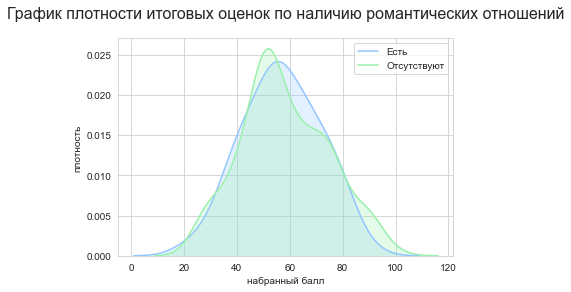

In [55]:
# Распределение баллов в зависимости от наличия романтических отношений
sns.kdeplot(stud_math.loc[stud_math['romantic'] == 'yes', 'score'],
            label='Есть',
            shade=True)
sns.kdeplot(stud_math.loc[stud_math['romantic'] == 'no', 'score'],
            label='Отсутствуют',
            shade=True)

# Добавление надписей
plt.xlabel('набранный балл', fontsize=14)
plt.ylabel('плотность', fontsize=14)
plt.title(
    'График плотности итоговых оценок по наличию романтических отношений',
    fontsize=16,
    pad=20)

Вывод: по наличию или отсутствию романтических отношений трудно предсказать итоговый балл. Не будем оставлять этот параметр для построения модели.

### Анализ распределения итогового балла для номинативных переменных при помощи box-plot

Посмотрим различаются ли распределения балла в зависимости от значения номинативных переменных, построив диаграммы типа box-plot.

Номинативные переменные, которые осталось рассмотреть: 'famsize', 'parents_status', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'mum_job', 'father_job', 'reason', 'guardian':

In [58]:
# функция для построения box-plot
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(6, 2))
    sns.boxplot(x=column,
                y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

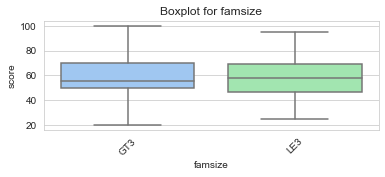

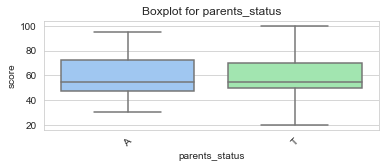

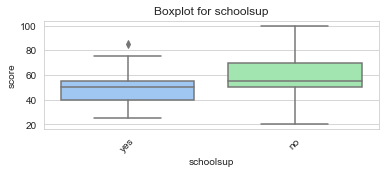

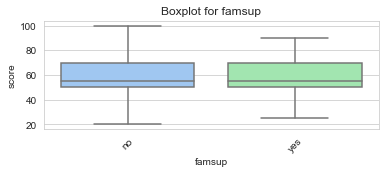

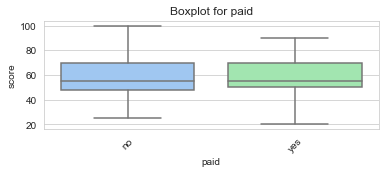

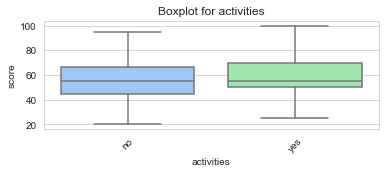

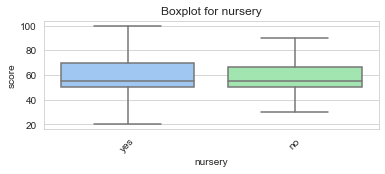

In [59]:
for col in [
        'famsize', 'parents_status', 'schoolsup', 'famsup', 'paid',
        'activities', 'nursery'
]:
    get_boxplot(col)

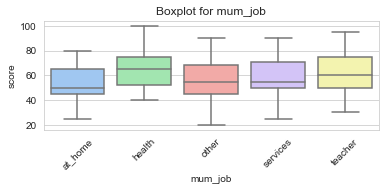

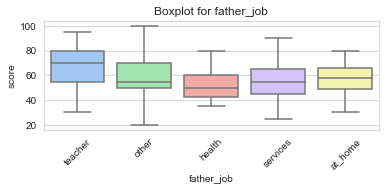

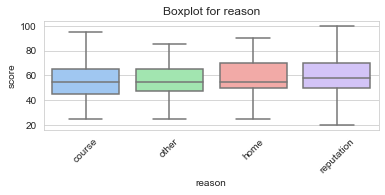

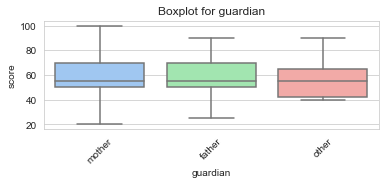

In [60]:
for col in ['mum_job', 'father_job', 'reason', 'guardian']:
    get_boxplot(col)

По графикам похоже, что влиять на итоговый балл могут параметры 'mum_job', 'father_job' и 'schoolsup'.

Посмотрим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

## Тест Стьюдента

Проверим нулевую гипотезу о том, что распределения баллов по математике по различным параметрам неразличимы:

In [61]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # учет поправки Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [62]:
for col in ['famsize', 'parents_status',
            'mum_job', 'father_job', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery',
            'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mum_job
Найдены статистически значимые различия для колонки father_job
Найдены статистически значимые различия для колонки schoolsup


Cерьёзно отличаются три параметра: 'mum_job', 'father_job' и 'schoolsup' (дополнительная образовательная поддержка). Оставим эти переменные в датасете для дальнейшего построения модели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на итоговую оценку ('score'), это: 'age', 'address', 'mum_edu', 'father_edu', 'mum_job', 'father_job', 'studytime', 'goout', 'schoolsup', 'higher', 'internet', 'failures',
'score'.

В случае, если необходимо сократить количество переменных, то можно убрать данные о возрасте учащихся ('age'), т.к. у данного параметра нет линейной зависимости. Также можно исключить сведения о работе отца ('father_job'), поскольку большинство значений в этом столбце имеют значение 'другое'.

In [71]:
# создадим новый датафрейм для построения модели
stud_math_for_model = stud_math.loc[:, [
    'age', 'address', 'mum_edu', 'father_edu', 'mum_job', 'father_job',
    'studytime', 'goout', 'schoolsup', 'higher', 'internet', 'failures',
    'score'
]]
stud_math_for_model.head(10)

,age,address,mum_edu,father_edu,mum_job,father_job,studytime,goout,schoolsup,higher,internet,failures,score
0,18,U,4.0,4.0,at_home,teacher,2.0,4.0,yes,yes,yes,0.0,30.0
1,17,U,1.0,1.0,at_home,other,2.0,3.0,no,yes,yes,0.0,30.0
2,15,U,1.0,1.0,at_home,other,2.0,2.0,yes,yes,yes,3.0,50.0
3,15,U,4.0,2.0,health,other,3.0,2.0,no,yes,yes,0.0,75.0
4,16,U,3.0,3.0,other,other,2.0,2.0,no,yes,no,0.0,50.0
5,16,U,4.0,3.0,services,other,2.0,2.0,no,yes,yes,0.0,75.0
6,16,U,2.0,2.0,other,other,2.0,4.0,no,yes,yes,0.0,55.0
7,17,U,4.0,4.0,other,teacher,2.0,4.0,yes,yes,no,0.0,30.0
9,15,U,3.0,4.0,other,other,2.0,1.0,no,yes,yes,0.0,75.0
10,15,U,4.0,4.0,teacher,health,2.0,3.0,no,yes,yes,0.0,45.0


# Выводы

В результате EDA для анализа влияния характеристик учащихся на балл по госэкзамену по математике были получены следующие выводы:

- В данных есть пустые значения, однако по каждому признаку пропуски не составляли более 12% от всех значений рассматриваемого параметра.
Полностью нулевые значения отсутствут только у колонок, в которых содержится информация о школе, поле ученика и его возрасте.
- Выбросы найдены в столбцах, в которых хранятся сведения об образовании отца, отношениях в семье, пропущенных занятиях. В столбце, где хранятся данные о балле по госэкзамену есть подозрительные значения, однако было принято решение их оставить, поскольку они не являются единичными и могут быть действительными, а не ошибочными.
- Положительная корреляция параметра 'mum_edu' и 'father_edu' c 'score' указывает на то, что с увеличением этих показателя (чем выше образование матери и отца) балл по госэкзамену имеет тенденцию к увеличению. Причем от уровня образования матери итоговый балл зависит сильнее, чем от образования отца.
Положительная корреляция параметра 'studytime' c 'score' может говорить о том, что при увеличении затрачиваемого времени на учёбу помимо школы показатель в столбце 'score' (итоговый балл) имеет возврастающих характер.
- Отрицательная корреляция параметров 'failures', 'age' и 'goout'  c 'score' может говорить о том, что с увеличением значений у этих показателей (наличия внеучебных неудач, чем старше ученик и ем больше ученик проведит время с друзьями) балл по госэкзамену имеет тенденцию к снижению.
- Самые важные параметры, которые предполагается использовать в дальнейшем для построения модели, это  'age', 'address', 'mum_edu', 'father_edu', 'mum_job', 'father_job', 'studytime', 'goout', 'schoolsup', 'higher', 'internet', 'failures' и 'score'.
- Параметр 'age' оказывает влияние на итоговый балл только в том случае, если этот показатель выше 20. Линейной зависимости нет.
- Параметр 'father_job' имеет существенно много значений 'другое'.